In [64]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Pas fixe

## Schéma d'Euler explicite

In [38]:
def solve_euler_explicit(f, x0, dt, tf):  # on prend l'instant initial nul
    X = [x0]
    T = [0]
    j = int(tf / dt)
    for k in range(j):
        X.append(X[k] + dt * f(X[k]))
        T.append((k + 1) * dt)
    return X, T

On teste cette fonction sur une équation différentielle très simple : $\dot x = -x$ de solution exponentielle décroissante. On illustre ensuite la convergence d'ordre 1 du schéma.

Temps d execution : 0.00061798095703125 secondes ---


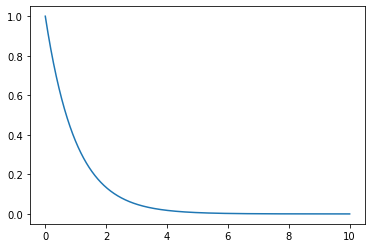

In [65]:
start_time = time.time()
X, T = solve_euler_explicit(lambda x: -x, 1, 0.01, 10)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
plt.plot(T, X)
plt.show()

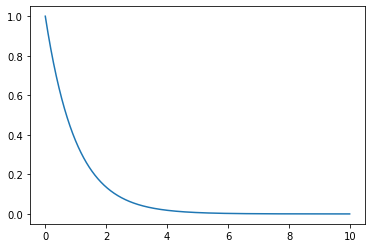

In [40]:
# comparaison avec la courbe réelle théorique
# on a fait deux courbes différentes car les courbes sur un même graphe étaient superposées

x = np.array([k / 100 for k in range(0, 1000)])
Y = np.exp(-x)

plt.plot(x, Y)
plt.show()

La fonction Max suivante calcule, en fonction du pas de temps dt choisi, $max_j ||x^j - x(t_j)||$. On veut montrer la convergence d'ordre 1, i.e. par définition que $Max \leq c(dt)$ où c doit être indépendante de dt. Si $\displaystyle\lim_{dt\to 0} Max = 0 $ alors le schéma est bien convergent.

0.00018401635443993092


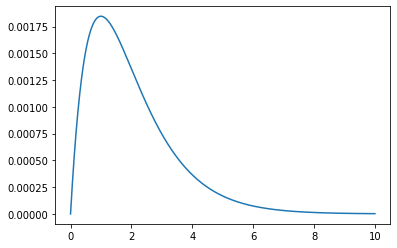

In [41]:
def Max(dt):
    X, T = solve_euler_explicit(lambda x: -x, 1, dt, 10)
    M = max([abs(np.exp(-T[k]) - X[k]) for k in range(1000)])
    return M


np.vectorize(Max)
print(Max(0.001))

# on trace également l'erreur (pour un pas de temps donné) en fonction du temps et on voit qu'elle passe par un max
E = [abs(np.exp(-T[k]) - X[k]) for k in range(1001)]
plt.plot(T, E)
plt.show()

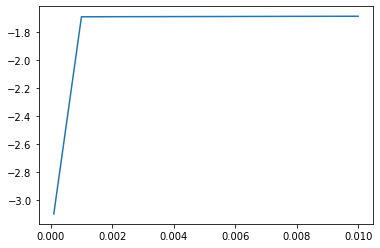

In [42]:
# On trace log Max - log dt en fonction de dt et cela doit être majoré par une constante

DT = np.array([0.01, 0.001, 0.0001])
MM = np.array([Max(dt) for dt in DT])
LogM = np.array([np.log(Max(dt)) - np.log(dt) for dt in DT])
plt.plot(DT, LogM)
plt.show()

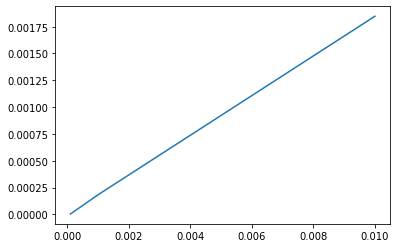

In [43]:
# plus simplement, on peut aussi tracer Max en fonction de dt pour mettre en évidence la linéarité de l'erreur

plt.plot(DT, MM)

## Schéma d'ordre 2 : méthode de Heun

On fait la même analyse que précédemment : on illustre la convergence d'ordre 2 cette fois-ci

In [44]:
def solve_Heun(f, x0, dt, tf):
    X = [x0]
    T = [0]
    j = int(tf / dt)
    for k in range(j):
        X.append(X[k] + dt * (1/2) * (f(X[k]) + f(X[k] + dt * f(X[k]))))
        T.append((k + 1) * dt)                              
    return X, T

Temps d execution : 0.0009877681732177734 secondes ---


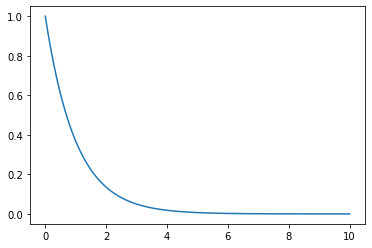

In [66]:
# On ne trace pas la courbe réelle : la méthode étant d'ordre 2, elle doit mieux marcher que la précédente

start_time = time.time()
XX, TT = solve_Heun(lambda x: -x, 1, 0.01, 10)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
plt.plot(TT, XX)
plt.show()

6.13592179288247e-08


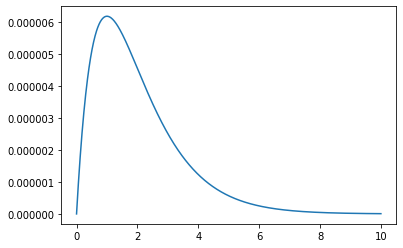

In [61]:
def Maxbis(dt):
    XX, TT = solve_Heun(lambda x: -x, 1, dt, 10)
    Mbis = max([abs(np.exp(-TT[k]) - XX[k]) for k in range(1000)])
    return Mbis


print(Maxbis(0.001))

E = [abs(np.exp(-TT[k]) - XX[k]) for k in range(1001)]
plt.plot(TT, E)
plt.show()

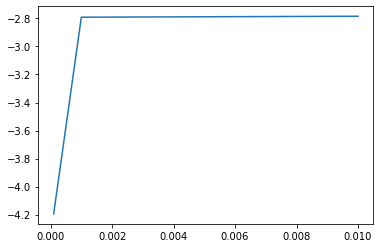

In [62]:
# On trace log Max - 2*log dt en fonction de dt et cela doit être majoré par une constante

DT = np.array([0.01, 0.001, 0.0001])
MMM = np.array([Maxbis(dt) for dt in DT])
LogMM = np.array([np.log(Maxbis(dt)) - 2*np.log(dt) for dt in DT])
plt.plot(DT, LogMM)
plt.show()

# Estimation de l'erreur et adaptation du pas de temps

Montrons que, si f est continûment dérivable, l'erreur vérifie pour un schéma d'Euler explicite :
$2 \lVert e^{j+1} \rVert =  \Delta t_j \lVert f(t_{j+1}, x^{j+1})-f(t_j, x^j)\rVert + O((\Delta t_j)^3)$

* On remarque d'abord grâce au paragraphe sur l'erreur globale et grâce à l'erreur de consistance du schéma d'Euler que:
$\lVert x(t_j)-x^j \rVert = O((\Delta t_j)^2)$

Or par défintion de l'erreur locale pour Euler, $ \displaystyle e^{j+1} = \left| \int_{t_j}^{t_{j+1}}[f(s,x(s))-f(t_j,x^j)]ds  \right |$

Or $f$ est de classe  $ \mathcal{C}^1 $ donc par l'inégalité des accroissements finis : $ \displaystyle e^{j+1} \leq \left| \int_{t_j}^{t_{j+1}}k[x(s)-x^j]ds  \right |$

Et par l'inégalité trinagulaire : $ |x(s)-x^j|\leq |x(s)-x(t_j)| + |x(t_j)-x^j|\leq k\Delta t + k'(\Delta t)^2 $
car $ \dot{x}=f(x)$

D'où en intégrant, $ \boxed{e^{j+1} = O((\Delta t)^2)}$.

* Par ailleurs, par un développement de Taylor, on obtient (on peut écrire le O car f est continûment dérivable):
$ f(s,x(s)) = f(t_j, x^j)+(s-t_j)[\partial_s f(t_j,x^j)+f(t_j,x^j)\partial_x f(t_j,x^j)] + O((\Delta t_j)^2)$

où l'on a identifiè $x(s)$ et $\tilde x(s)$ (notation de l'énoncé pour la définition de l'erreur) en utilisant $x(t_j)=x^j$ (seulement pour j et par pour j+1)

d'où en intégrant : $ \displaystyle e^{j+1} = \frac{(\Delta t_j)^2}{2}[\partial_s f(t_j,x^j)+f(t_j,x^j)\partial_x f(t_j,x^j)]+ O((\Delta t_j)^3)$

Or 
$ f(t_{j+1},x^{j+1})=f(t_j,x^j)+\Delta t_j(\partial_s f(t_j,x^j)+f(t_j,x^j)\partial_x f(t_j,x^j)+O((\Delta t_j)^2)$ en faisant un DL d'une fonction de deux variables et en remarquant que la norme utilisée dans le O correspond bien à ce qui est écrit. 

Finalement, on a bien :
$ \boxed{\lVert e^{j+1} \rVert =  \frac{\Delta t_j}{2} \lVert f(t_{j+1}, x^{j+1})-f(t_j, x^j)\rVert + O((\Delta t_j)^3)}$

* Comme $e^{j+1} = O((\Delta t_j)^2)$, une possible stratégie d'adaptation du pas de temps serait : $ \Delta t_{new} = \Delta t_j \displaystyle \sqrt{ \frac{Tol_{abs}}{||e^{j+1}||}}$. En effet, quand l'erreur est 2 fois plus petite que la Tolérance, le pas de temps varie en racine de 2

# Fonctionnement du solveur fourni dans Equations Differentielles II.ipynb

-> J'ai fait un deuxième notebook "commentaires solveur fourni" où j'ai recopié le programme fourni et rajouté un bloc de commentaires sous le premier bloc de code

### Fonctionnement général

On veut que la fonction solve_ivp_euler_explicit_variable_step renvoie des listes echantillonnées à $dt_{max}$. Or le pas de temps est variable. On avance alors par petits sauts de pas variables entre le dernier point stocké et le suivant, afin d'avoir des listes finales échantillonnées à un pas de temps fixe et contrôlé, avec une erreur de troncature locale minimale.

Le problème de cette méthode par rapport aux méthodes est son temps d'exécution (c'est nécessaire pour gagner en précision !)

In [75]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t, x)
            x_back = x_next - dt * f(t_next, x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * np.sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        ts += [t_next]
        xs += [x_next]
        t, ti, x = t_next, ti_next, x_next
    return ts, xs

Temps d execution : 0.06379318237304688 secondes ---


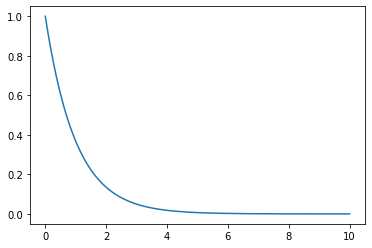

In [76]:
t0=0
tf=10
x0=1
dt=0.01 

f1 = lambda t, x: -x
start_time=time.time()
TTT,XXX=solve_ivp_euler_explicit_variable_step(f1,t0, x0, tf)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
plt.plot(TTT,XXX)
plt.show()

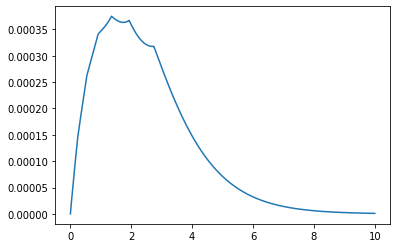

In [77]:
EE = [abs(np.exp(-TTT[k]) - XXX[k]) for k in range(1001)]
plt.plot(TTT, EE)
plt.show()

Pour dt = 0.01, on obtient une erreur maximale 5 fois plus faible que pour Euler explicite mais le temps d'exécution est plus long, et l'erreur est plus grande que pour Heun. On en déduit que la méthode à pas variable améliore sans doute tout schéma en échange d'un côut en temps.